## 1 import data and Required Packages

In [78]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pickle
import joblib

### Reading the dataset


In [79]:
df=pd.read_csv('task_management_dataset.csv')

In [80]:
df.head()

,Task,Category,Priority,Deadline,Assigned_To,User_Behavior_Score,Status,Workload
0,Write guide for the engineer_magnetic_solution...,Documentation,Low,2025-05-21,Preet,0.84,Completed,High
1,Investigate the seize_cross-platform_partnersh...,Research,Medium,2025-05-22,Naman,0.50,Completed,Medium
2,Implement the unleash_sticky_schemas before Tu...,Feature,High,2025-06-03,Bibhab,0.59,Completed,Low
3,Develop the transform_cross-media_markets befo...,Feature,Medium,2025-05-22,Smit,0.67,Pending,Medium
4,Create the drive_dot-com_methodologies before ...,Feature,Medium,2025-05-25,Smit,0.67,Pending,Medium


In [81]:
df.shape

(2000, 8)

## 2. Data checks perform

### 2.1 check missing values

In [82]:
df.isna().sum()

Task                   0
Category               0
Priority               0
Deadline               0
Assigned_To            0
User_Behavior_Score    0
Status                 0
Workload               0
dtype: int64

### 2.1 check duplicates

In [83]:
df.duplicated().sum()

np.int64(0)

### 2.2 Check Data type

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Task                 2000 non-null   object 
 1   Category             2000 non-null   object 
 2   Priority             2000 non-null   object 
 3   Deadline             2000 non-null   object 
 4   Assigned_To          2000 non-null   object 
 5   User_Behavior_Score  2000 non-null   float64
 6   Status               2000 non-null   object 
 7   Workload             2000 non-null   object 
dtypes: float64(1), object(7)
memory usage: 125.1+ KB


### 2.3 Checking the number of unique values of each column

In [85]:
df.nunique()

Task                   2000
Category                 10
Priority                  3
Deadline                 21
Assigned_To               5
User_Behavior_Score       5
Status                    3
Workload                  3
dtype: int64

### 2.4 Check statistics of dataset

In [86]:
df.describe()

,User_Behavior_Score
count,2000.000000
mean,0.578230
std,0.188412
min,0.270000
25%,0.500000
50%,0.590000
75%,0.670000
max,0.840000


### 2.5 Explore Data

In [87]:
print("Catagories in 'Task Description' variable: ",end=" ")
print(df['Task'].unique())

print("Categories in 'Category' variable: ",end=" ")
print(df['Category'].unique())

print("Categories in 'Priority' variable: ",end=" ")
print(df['Priority'].unique())

print("Categories in 'Deadline' variable: ",end=" ")
print(df['Deadline'].unique())

print("Categories in 'User Behavior Score': ",end=" ")
print(df['User_Behavior_Score'].unique())

print("Categories in 'Working status': ",end=" ")
print(df['Status'].unique())

Catagories in 'Task Description' variable:  ['Write guide for the engineer_magnetic_solutions before Wednesday'
 'Investigate the seize_cross-platform_partnerships before Thursday'
 'Implement the unleash_sticky_schemas before Tuesday' ...
 'Summarize the optimize_distributed_eyeballs before Monday'
 'Validate the incentivize_sticky_eyeballs before Tuesday'
 'Monitor the brand_intuitive_communities before Monday']
Categories in 'Category' variable:  ['Documentation' 'Research' 'Feature' 'Maintenance' 'Deployment'
 'Code Review' 'Optimization' 'Testing' 'Bug' 'Design']
Categories in 'Priority' variable:  ['Low' 'Medium' 'High']
Categories in 'Deadline' variable:  ['2025-05-21' '2025-05-22' '2025-06-03' '2025-05-25' '2025-05-26'
 '2025-05-29' '2025-06-04' '2025-05-24' '2025-05-27' '2025-06-02'
 '2025-05-28' '2025-05-30' '2025-05-23' '2025-06-05' '2025-06-07'
 '2025-06-10' '2025-06-09' '2025-06-08' '2025-06-06' '2025-05-31'
 '2025-06-01']
Categories in 'User Behavior Score':  [0.84 0.5  0

In [88]:
## define neumerical & categorical columns
numeric_features=[feature for feature in df.columns if df[feature].dtype !='O']
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O']

## print columns
print('We have {} numerical features :{}'.format(len(numeric_features),numeric_features))
print('nWe have {} categorical features: {}'.format(len(categorical_features),categorical_features))

We have 1 numerical features :['User_Behavior_Score']
nWe have 7 categorical features: ['Task', 'Category', 'Priority', 'Deadline', 'Assigned_To', 'Status', 'Workload']


## 3 Visualization

### 3.1 Task Distribution By ccatagory

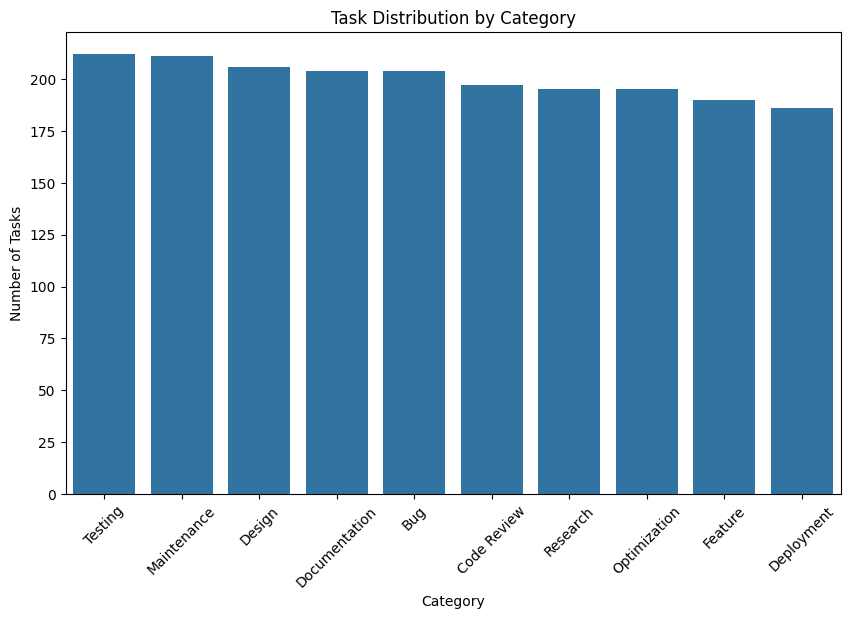

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index)
plt.title('Task Distribution by Category')
plt.xlabel('Category')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.show()

### 3.2 Task Priority Distribution

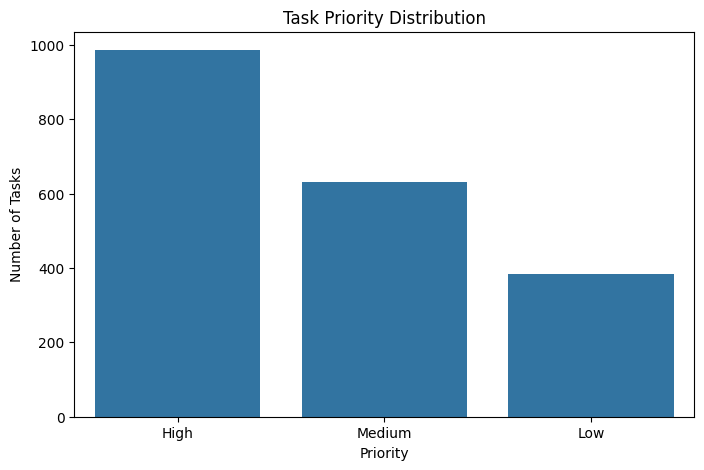

In [90]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Priority', order=df['Priority'].value_counts().index)
plt.title('Task Priority Distribution')
plt.xlabel('Priority')
plt.ylabel('Number of Tasks')
plt.show()

### 3.3 Average User Behavior Score by Assigned User

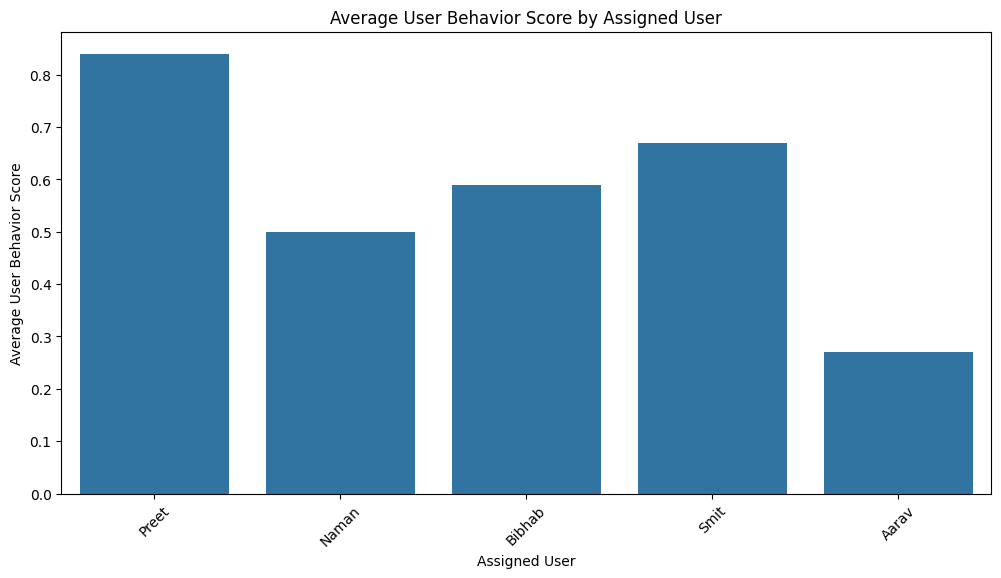

In [91]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='Assigned_To', y='User_Behavior_Score', estimator='mean')
plt.title('Average User Behavior Score by Assigned User')
plt.xlabel('Assigned User')
plt.ylabel('Average User Behavior Score')
plt.xticks(rotation=45)
plt.show()

### 3.4 Task Completion Deadline Analysis

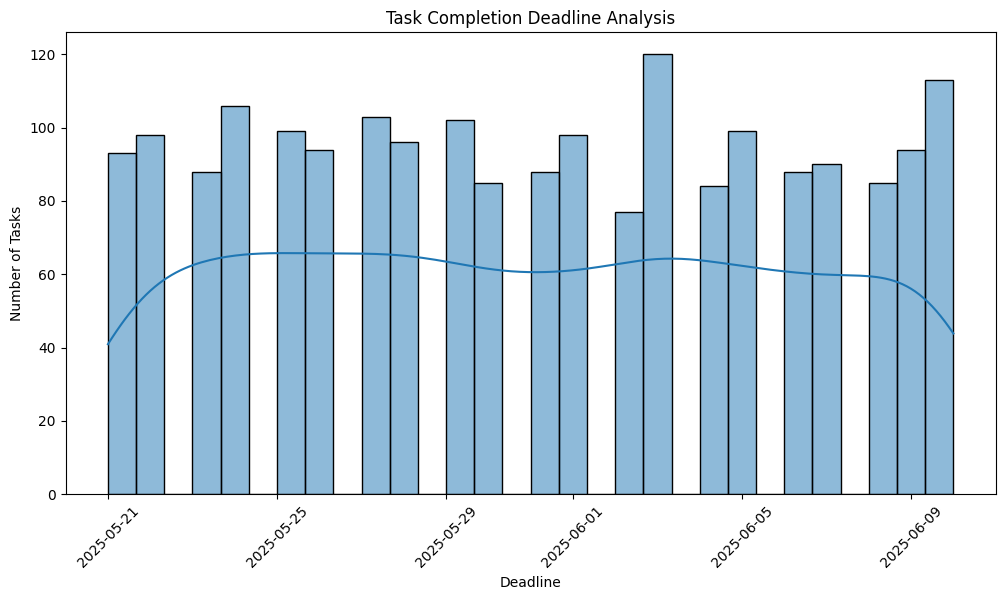

In [92]:
df['Deadline'] = pd.to_datetime(df['Deadline'])
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Deadline', bins=30, kde=True)
plt.title('Task Completion Deadline Analysis')
plt.xlabel('Deadline')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.show()

### 3.5 Task creation/completion trends over time

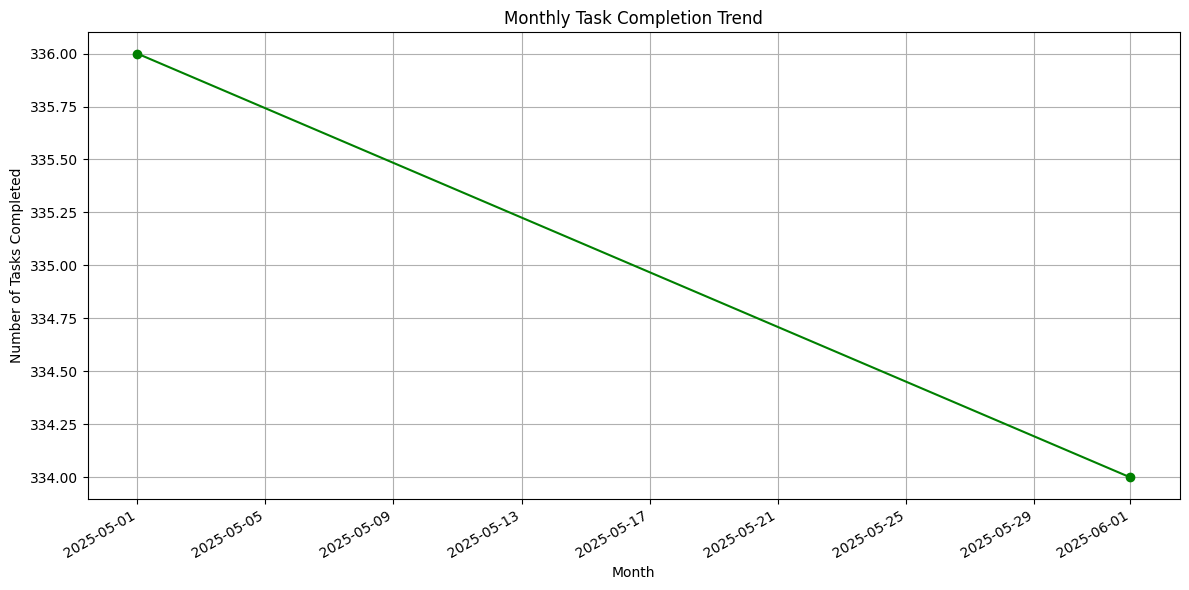

In [93]:
# Create a new column for completion status
df['Is_Completed'] = df['Status'].apply(lambda x: 1 if x == 'Completed' else 0)
# Group by month and count the number of completed tasks
completion_counts = df.groupby(df['Deadline'].dt.to_period('M'))['Is_Completed'].sum()
# Convert the index back to a timestamp for plotting
completion_counts.index = completion_counts.index.to_timestamp()
# Plotting the task completion trend
plt.figure(figsize=(12, 6))
completion_counts.plot(marker='o', color='green')
plt.title('Monthly Task Completion Trend')
plt.xlabel('Month')
plt.ylabel('Number of Tasks Completed')
plt.grid(True)
plt.tight_layout()
plt.show()

### 3.6 Correlation heatmap of numeric fields

In [94]:
df.drop('Task',axis=1,inplace=True)

In [95]:
df_encoded = pd.get_dummies(df, drop_first=True)

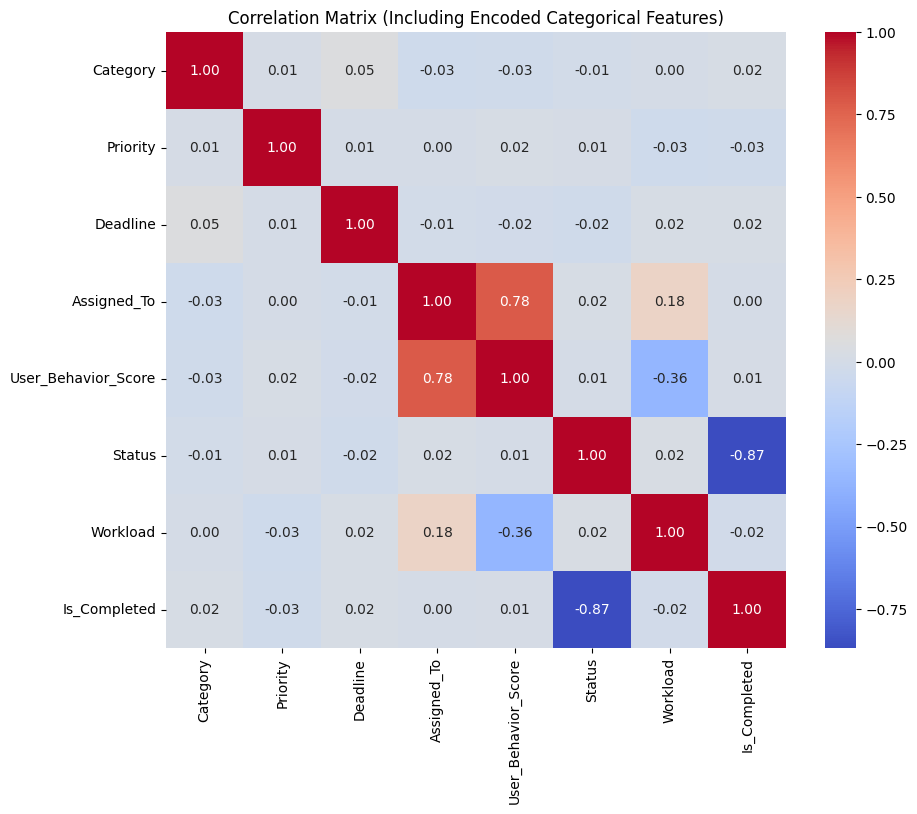

In [96]:
from sklearn.preprocessing import LabelEncoder
# Create a copy of the dataframe
df_encoded = df.copy()

# Columns to encode
categorical_cols = ['Category', 'Priority', 'Deadline', 'Assigned_To','Status','Workload']

# Apply Label Encoding to each categorical column
le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Now compute correlation matrix
correlation_matrix = df_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix (Including Encoded Categorical Features)')
plt.show()

### 3.7 Box plot of User Behavior Score by Priority

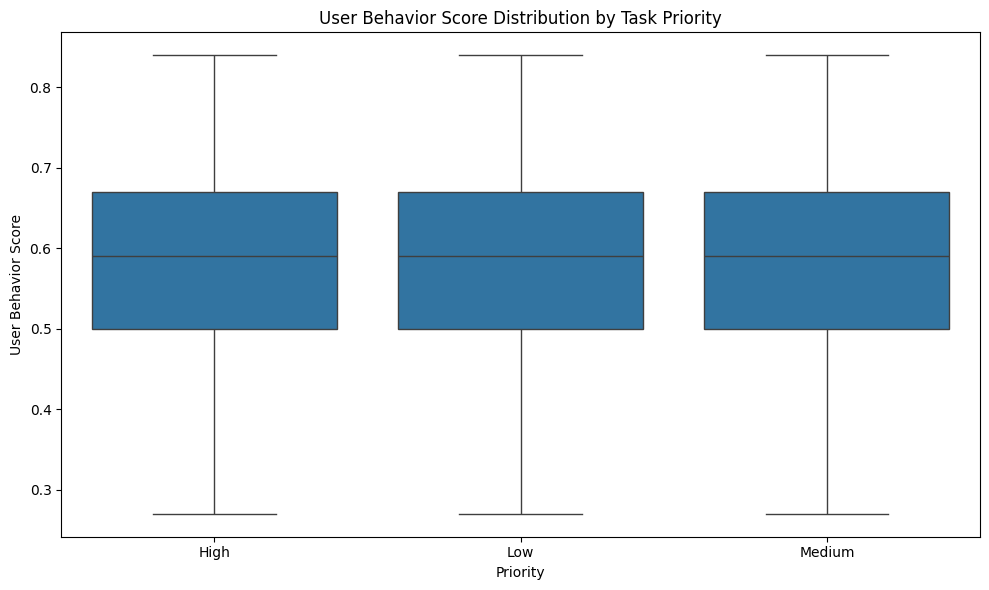

In [97]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Priority', y='User_Behavior_Score', order=sorted(df['Priority'].unique()))
plt.title('User Behavior Score Distribution by Task Priority')
plt.xlabel('Priority')
plt.ylabel('User Behavior Score')
plt.tight_layout()
plt.show()

### 3.8 Stacked bar chart: Task counts by Category and Priority

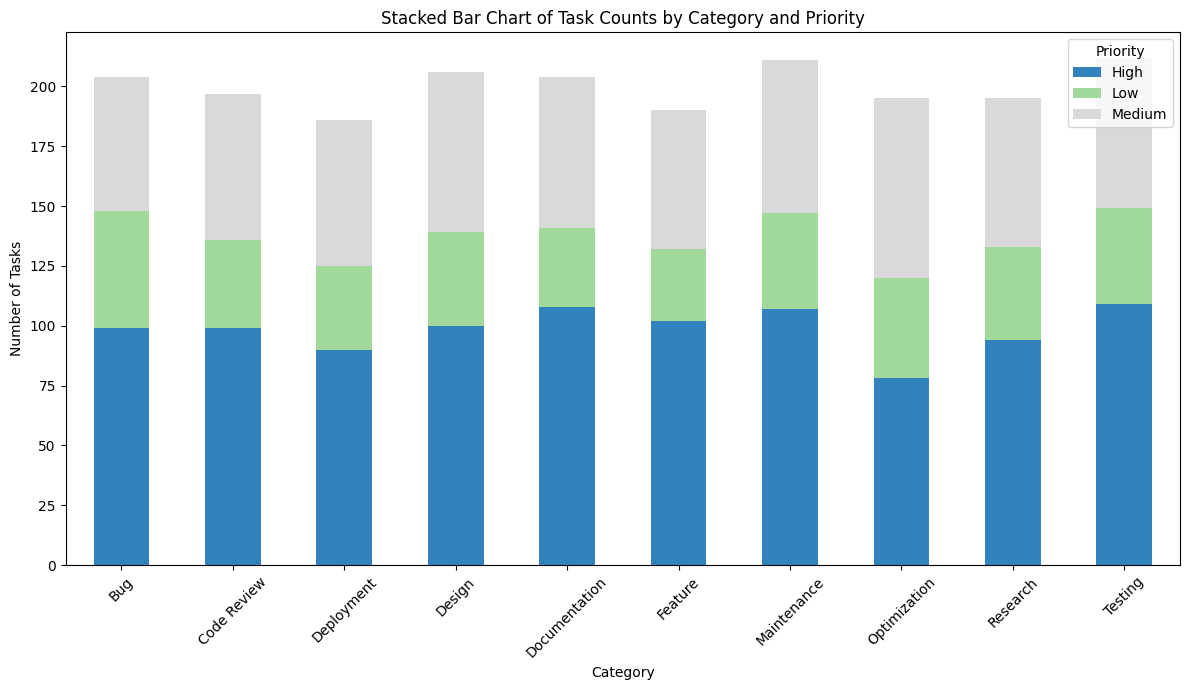

In [98]:
category_priority = df.groupby(['Category', 'Priority']).size().unstack(fill_value=0)
category_priority.plot(kind='bar', stacked=True, figsize=(12, 7), colormap='tab20c')
plt.title('Stacked Bar Chart of Task Counts by Category and Priority')
plt.xlabel('Category')
plt.ylabel('Number of Tasks')
plt.xticks(rotation=45)
plt.legend(title='Priority')
plt.tight_layout()
plt.show()

### 3.9 Pie Chart of Task Status

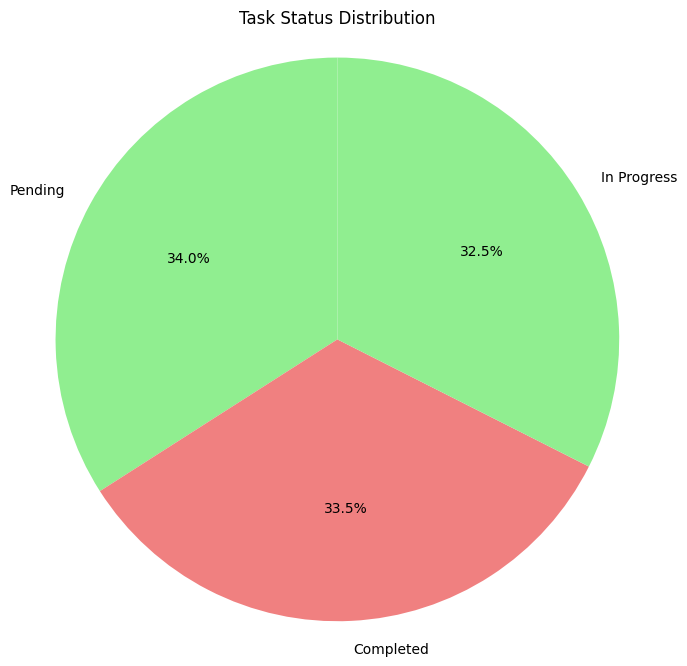

In [99]:
# Count the number of tasks by status
status_counts = df['Status'].value_counts()
# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'lightcoral'])
plt.title('Task Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()